#Jayachandra Vijayaraj - 22BAI1453

#TASK 1 - Import Libraries & Generate 2D Datasets

In [ ]:
!pip install scikit-learn matplotlib seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN

X_blobs, y_blobs = make_blobs(n_samples=300, centers=3, random_state=42)

X_moons, y_moons = make_moons(n_samples=300, noise=0.05, random_state=42)

K-Means Clustering

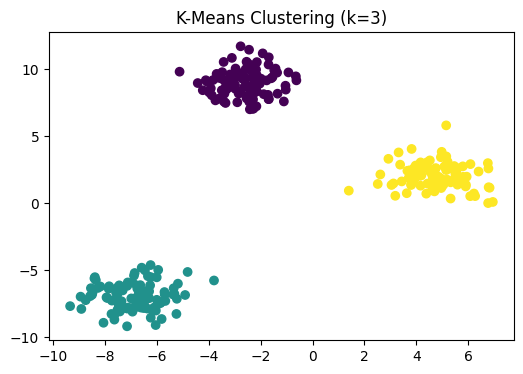

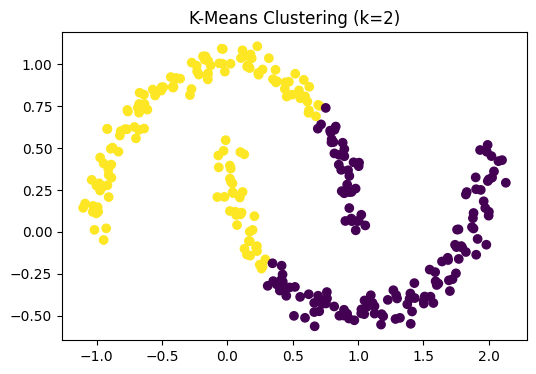

In [ ]:
def plot_kmeans(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    y_kmeans = kmeans.fit_predict(X)

    plt.figure(figsize=(6,4))
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
    plt.title(f'K-Means Clustering (k={n_clusters})')
    plt.show()

plot_kmeans(X_blobs, 3)
plot_kmeans(X_moons, 2)

 DBSCAN Clustering

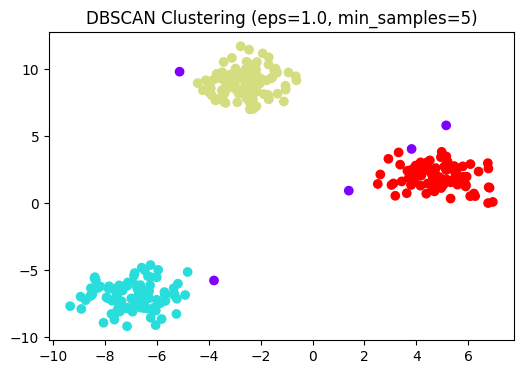

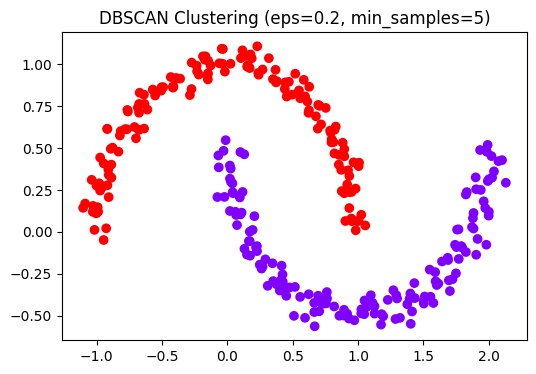

In [ ]:
def plot_dbscan(X, eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    y_db = db.fit_predict(X)

    plt.figure(figsize=(6,4))
    plt.scatter(X[:, 0], X[:, 1], c=y_db, cmap='rainbow')
    plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
    plt.show()

plot_dbscan(X_blobs, eps=1.0, min_samples=5)
plot_dbscan(X_moons, eps=0.2, min_samples=5)

Visual Comparison

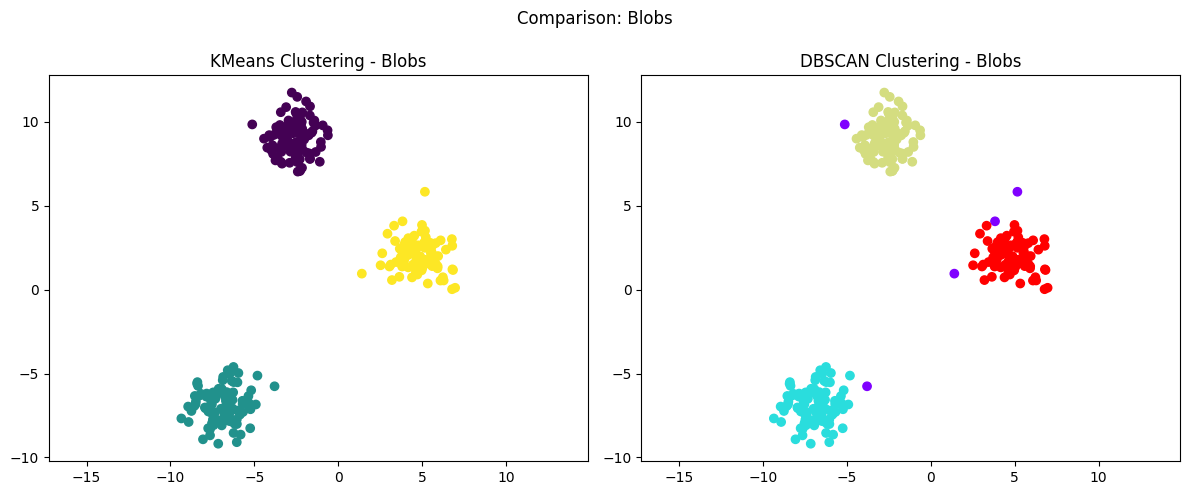

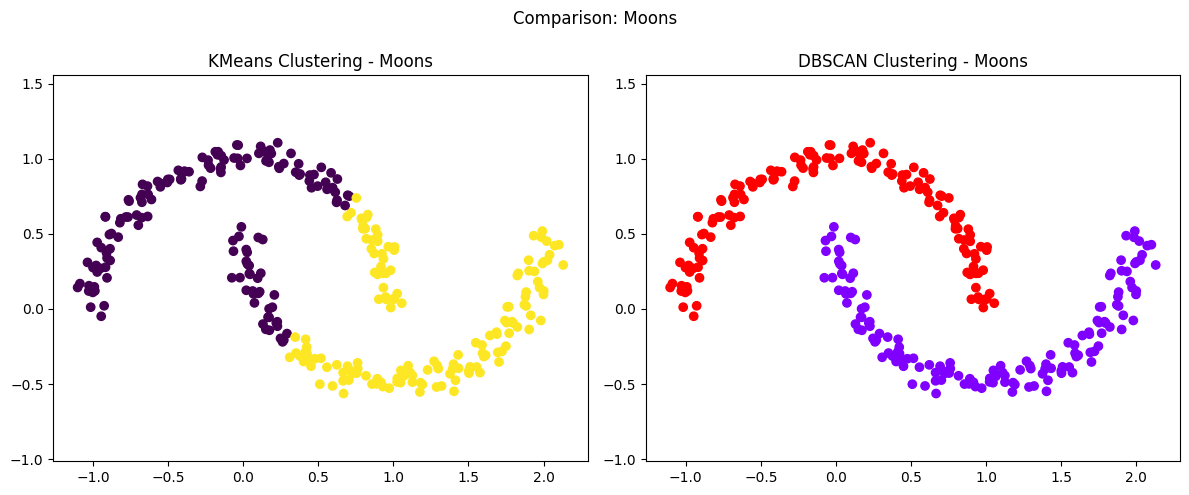

In [ ]:
from sklearn.datasets import make_blobs, make_moons

def compare_kmeans_dbscan(X, k, eps, min_samples, dataset_name):
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_kmeans = kmeans.fit_predict(X)

    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    y_dbscan = dbscan.fit_predict(X)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.title(f"KMeans Clustering - {dataset_name}")
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
    plt.axis('equal')

    plt.subplot(1, 2, 2)
    plt.title(f"DBSCAN Clustering - {dataset_name}")
    plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='rainbow')
    plt.axis('equal')

    plt.suptitle(f"Comparison: {dataset_name}")
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

X_blobs, _ = make_blobs(n_samples=300, centers=3, random_state=42)
compare_kmeans_dbscan(X_blobs, k=3, eps=1.0, min_samples=5, dataset_name="Blobs")

X_moons, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
compare_kmeans_dbscan(X_moons, k=2, eps=0.2, min_samples=5, dataset_name="Moons")

**CONCLUSION:** In this task, I implemented both K-Means and DBSCAN clustering on synthetic 2D datasets using make_blobs and make_moons. K-Means performed well on globular data but struggled with non-linear shapes.

 DBSCAN could handle arbitrary shapes and also identified noise/outliers effectively. This experiment deepened my understanding of unsupervised learning, which is vital for real-world AR/VR applications where data labels are often unavailable.

#TASK 2 - Image Segmentation using K-Mean

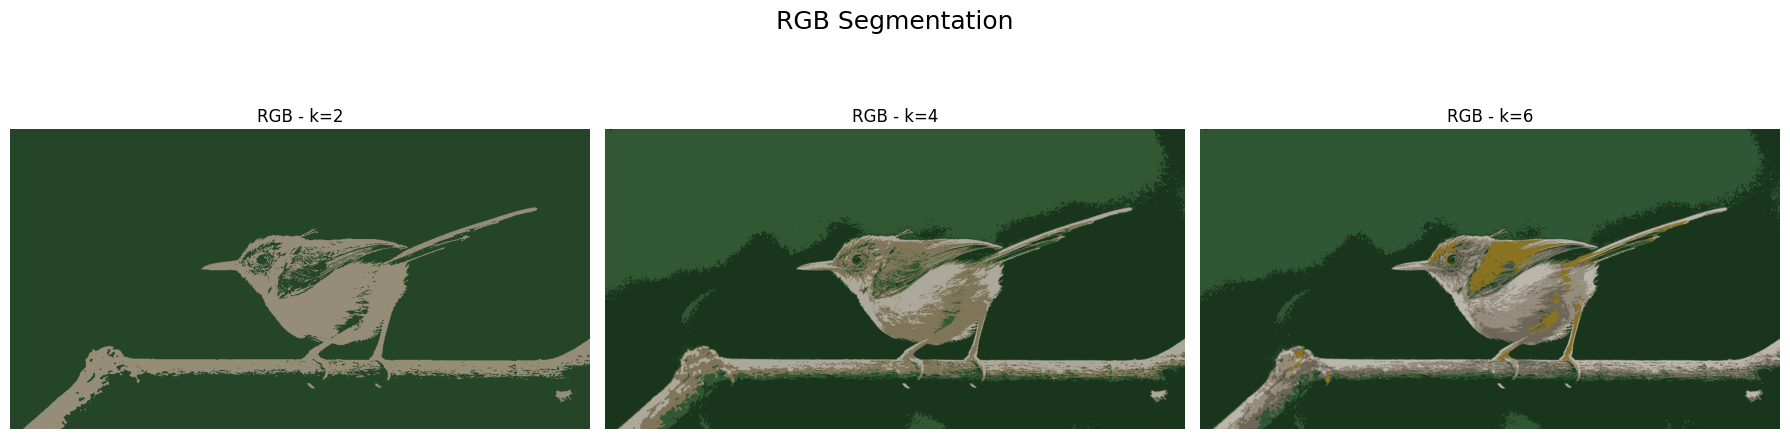

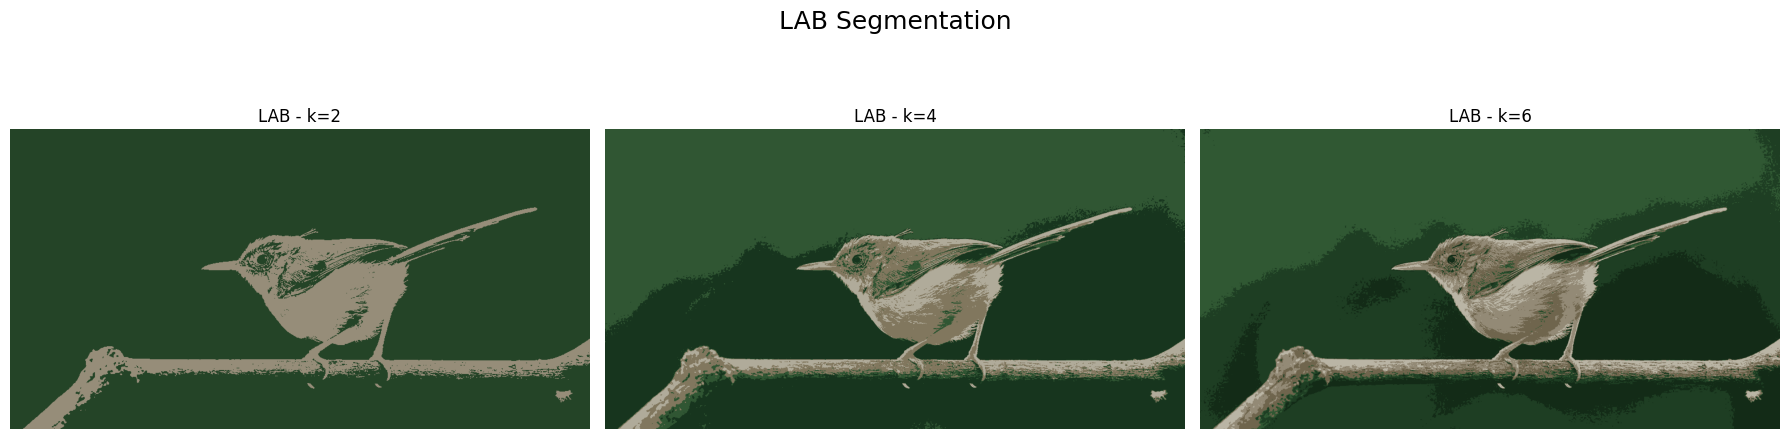

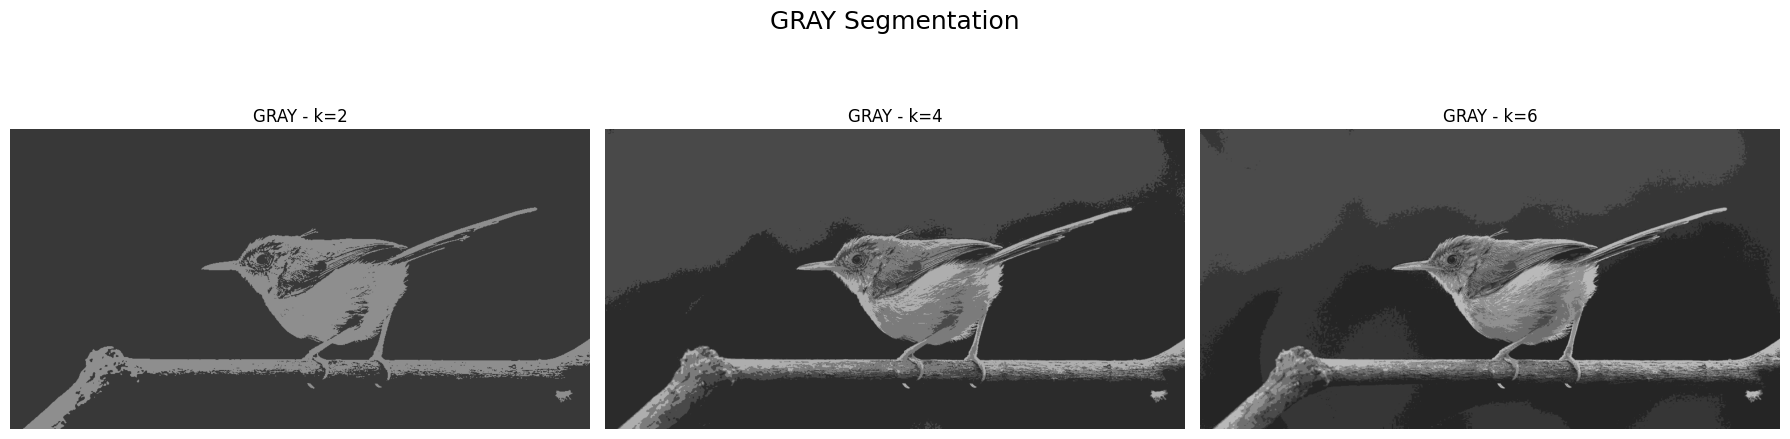

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def segment_image(image, color_space='RGB', k_values=[2, 4, 6]):
    segmented_images = []

    if color_space == 'LAB':
        image_converted = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    elif color_space == 'GRAY':
        image_converted = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:
        image_converted = image.copy()

    for k in k_values:
        if color_space == 'GRAY':
            pixels = image_converted.reshape(-1, 1)
        else:
            pixels = image_converted.reshape(-1, 3)

        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(pixels)
        clustered = kmeans.cluster_centers_[kmeans.labels_]

        if color_space == 'GRAY':
            segmented = clustered.reshape(image_converted.shape).astype(np.uint8)
            segmented_rgb = cv2.cvtColor(segmented, cv2.COLOR_GRAY2RGB)
        elif color_space == 'LAB':
            segmented = clustered.reshape(image_converted.shape).astype(np.uint8)
            segmented_rgb = cv2.cvtColor(segmented, cv2.COLOR_LAB2RGB)
        else:
            segmented_rgb = clustered.reshape(image.shape).astype(np.uint8)

        segmented_images.append(segmented_rgb)

    return segmented_images

def display_segmented_images(image, color_space):
    k_vals = [2, 4, 6]
    segmented = segment_image(image, color_space=color_space, k_values=k_vals)

    plt.figure(figsize=(18, 5))
    for i, img in enumerate(segmented):
        plt.subplot(1, 3, i + 1)
        plt.imshow(img)
        plt.title(f"{color_space} - k={k_vals[i]}")
        plt.axis('off')
    plt.suptitle(f"{color_space} Segmentation", fontsize=18)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

img = cv2.imread('Bird.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

display_segmented_images(img, 'RGB')
display_segmented_images(img, 'LAB')
display_segmented_images(img, 'GRAY')

**CONCLUSION:** K-Means was used to segment images by clustering similar pixel colors. By varying k, I observed that higher values gave more detailed segmentation.

LAB produced better perceptual results than RGB, while Grayscale offered limited detail. This task showed how unsupervised clustering can effectively group visual data, useful in AR/VR applications.

#TASK 3 - Dimensionality Reduction with PCA and t-SNE

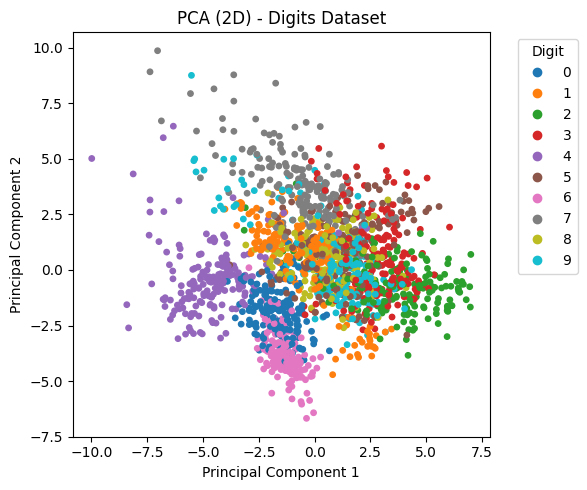

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

digits = load_digits()
X, y = digits.data, digits.target
X = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(6, 5))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', s=15)
plt.title("PCA (2D) - Digits Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(*scatter.legend_elements(), title="Digit", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

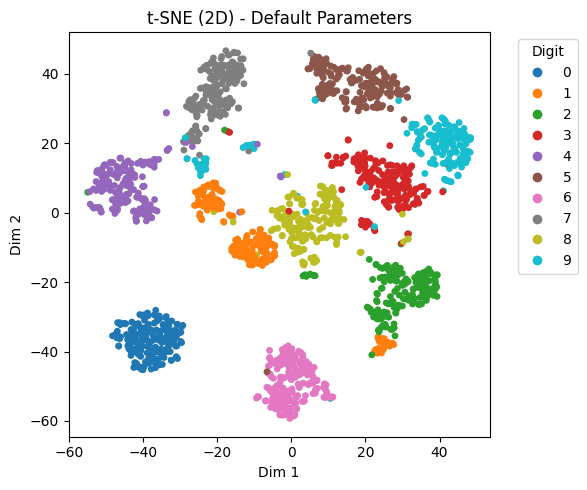

In [ ]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(6, 5))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', s=15)
plt.title("t-SNE (2D) - Default Parameters")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.legend(*scatter.legend_elements(), title="Digit", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

t-SNE Parameters (perplexity, learning_rate)

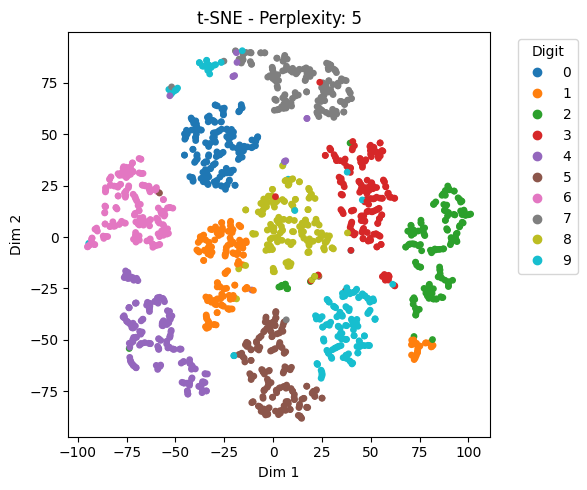

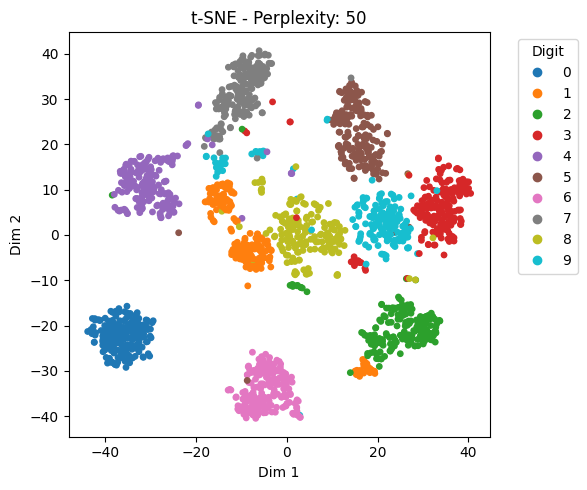

In [ ]:
for perplexity in [5, 50]:
    tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=200, random_state=42)
    X_tsne_varied = tsne.fit_transform(X)

    plt.figure(figsize=(6, 5))
    scatter = plt.scatter(X_tsne_varied[:, 0], X_tsne_varied[:, 1], c=y, cmap='tab10', s=15)
    plt.title(f"t-SNE - Perplexity: {perplexity}")
    plt.xlabel("Dim 1")
    plt.ylabel("Dim 2")
    plt.legend(*scatter.legend_elements(), title="Digit", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

**CONCLUSION:** PCA and t-SNE were used to reduce the high-dimensional Digits dataset to 2D. PCA preserved global structure well but had overlapping clusters. t-SNE gave better local separation of digit classes. Changing t-SNE’s perplexity showed how cluster shape and spacing change. This shows how dimensionality reduction helps uncover hidden structures in complex AR/VR datasets.

#TASK 4 -  Clustering Real-World Sensor Data

In [ ]:
import zipfile
import pandas as pd

with zipfile.ZipFile("/content/test.csv.zip", 'r') as zip_ref:
    zip_ref.extractall("/content")

df = pd.read_csv("/content/test.csv")

print("Shape:", df.shape)
print("Columns:", df.columns)
print(df.head())

Shape: (2947, 563)
Columns: Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.257178          -0.023285          -0.014654         -0.938404   
1           0.286027          -0.013163          -0.119083         -0.975415   
2           0.275485          -0.026050          -0.118152         -0.993819   
3           0.270298          -0.032614          -0.117520     

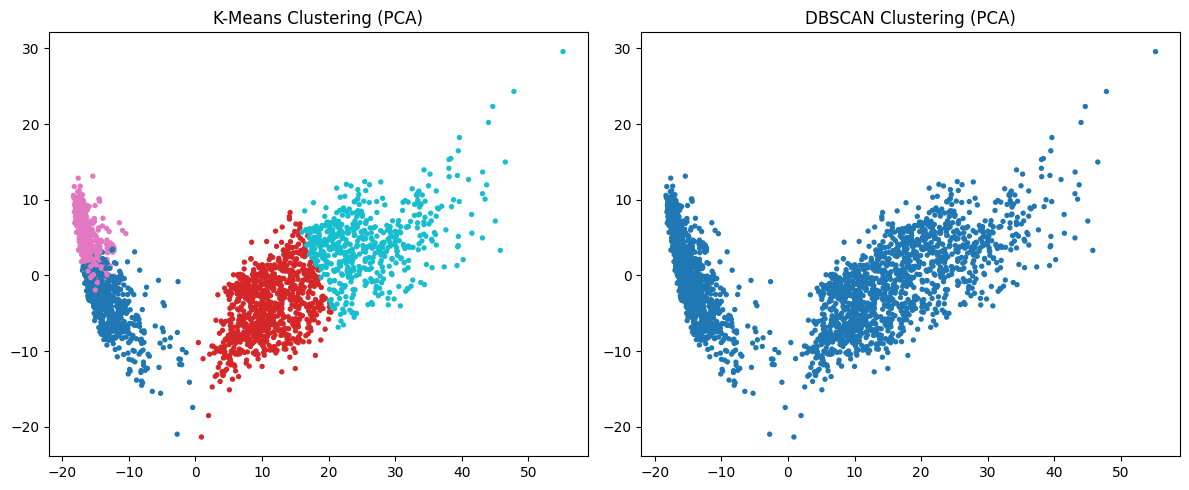

In [ ]:
from sklearn.preprocessing import StandardScaler

df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric = df_numeric.dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

from sklearn.cluster import KMeans, DBSCAN
kmeans = KMeans(n_clusters=4, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

dbscan = DBSCAN(eps=1.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='tab10', s=8)
plt.title("K-Means Clustering (PCA)")

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_dbscan, cmap='tab20', s=8)
plt.title("DBSCAN Clustering (PCA)")
plt.tight_layout()
plt.show()

Feature-Based Clustering Comparison

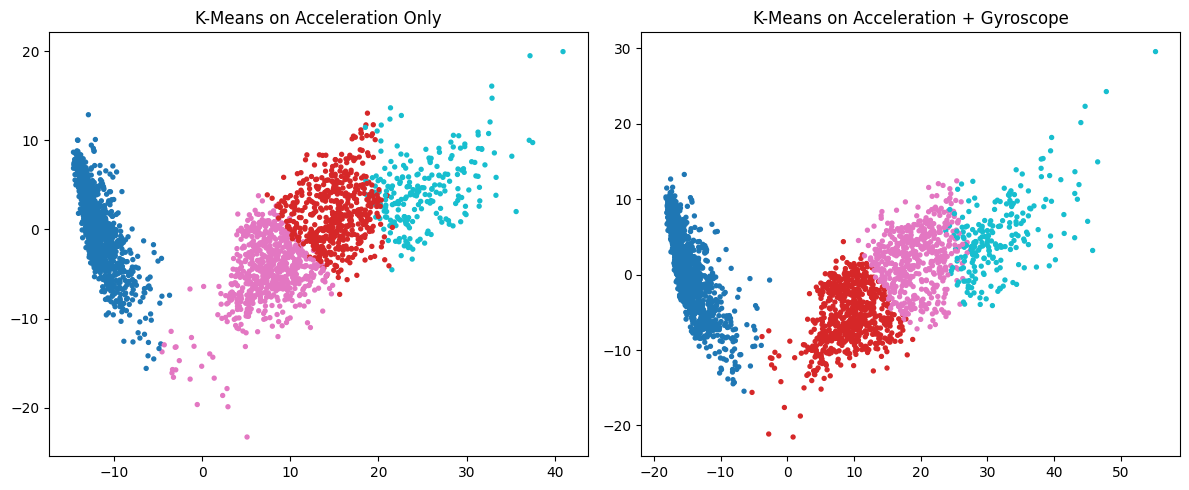

In [ ]:
accel_cols = [col for col in df_numeric.columns if 'acc' in col.lower()]
gyro_cols  = [col for col in df_numeric.columns if 'gyro' in col.lower()]

X_accel = df_numeric[accel_cols]
X_accel_scaled = scaler.fit_transform(X_accel)

X_combined = df_numeric[accel_cols + gyro_cols]
X_combined_scaled = scaler.fit_transform(X_combined)

kmeans_accel = KMeans(n_clusters=4, random_state=42)
labels_accel = kmeans_accel.fit_predict(X_accel_scaled)

kmeans_combined = KMeans(n_clusters=4, random_state=42)
labels_combined = kmeans_combined.fit_predict(X_combined_scaled)

pca = PCA(n_components=2)
X_accel_pca = pca.fit_transform(X_accel_scaled)
X_combined_pca = pca.fit_transform(X_combined_scaled)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_accel_pca[:, 0], X_accel_pca[:, 1], c=labels_accel, cmap='tab10', s=8)
plt.title("K-Means on Acceleration Only")

plt.subplot(1, 2, 2)
plt.scatter(X_combined_pca[:, 0], X_combined_pca[:, 1], c=labels_combined, cmap='tab10', s=8)
plt.title("K-Means on Acceleration + Gyroscope")

plt.tight_layout()
plt.show()

**CONCLUSION:** When clustering with only acceleration, the separation between clusters was weaker. After combining acceleration with gyroscope, the clusters became more distinct and tighter. This shows that sensor fusion helps extract clearer user activity patterns, a key principle in AR/VR motion understanding.

#TASK 5 - Overlay Clustering Output on Image

Clustering + Contour Overlay on Image

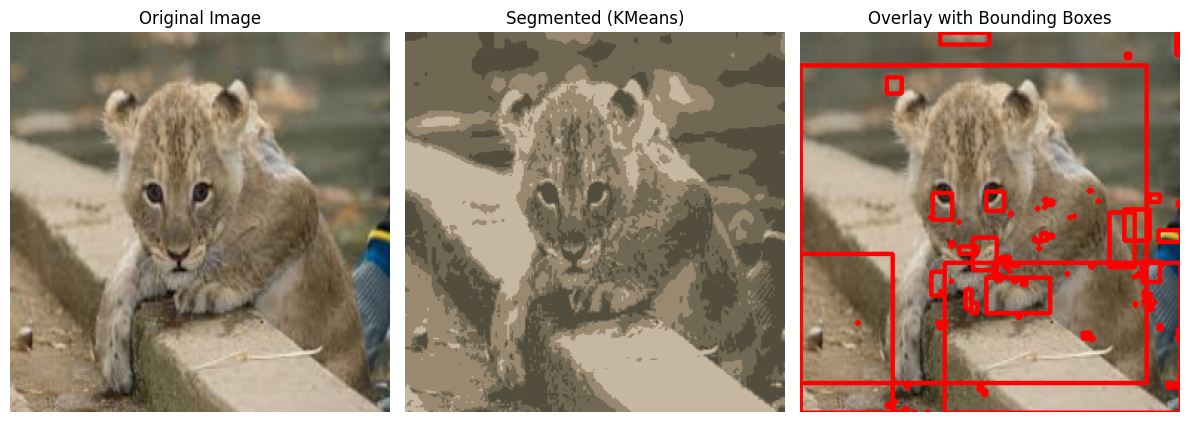

In [42]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

img = cv2.imread('/content/Animal.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_small = cv2.resize(img, (256, 256))

pixels = img_small.reshape(-1, 3)

k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pixels)
segmented_img = kmeans.cluster_centers_[kmeans.labels_].astype(np.uint8)
segmented_img = segmented_img.reshape(img_small.shape)

gray = cv2.cvtColor(segmented_img, cv2.COLOR_RGB2GRAY)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = img_small.copy()

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(output, (x, y), (x+w, y+h), (255, 0, 0), 2)

plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_small)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(segmented_img)
plt.title("Segmented (KMeans)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(output)
plt.title("Overlay with Bounding Boxes")
plt.axis('off')

plt.tight_layout()
plt.show()

Real-Time Simulation with Webcam

In [43]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_resized = cv2.resize(frame, (160, 160))
    pixels = frame_resized.reshape(-1, 3)

    kmeans = KMeans(n_clusters=3, n_init=1, max_iter=10)
    kmeans.fit(pixels)
    clustered = kmeans.cluster_centers_[kmeans.labels_].astype(np.uint8).reshape(frame_resized.shape)

    gray = cv2.cvtColor(clustered, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(clustered, (x, y), (x+w, y+h), (0, 255, 0), 2)

    cv2.imshow("AR-Like Segmentation", clustered)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

**CONCLUSION:** KMeans was used to segment an image by clustering similar pixel colors. Then, using OpenCV, contours of these segments were detected and bounding boxes were drawn on the original image. This simulates how unsupervised clustering can be visually overlaid in AR systems for early object detection or region marking. The same method was extended to real-time video for an AR-like experience.

#TASK 6 - Implement a Real GitHub Repo (No GPU Required)

In [44]:
!git clone https://github.com/VartikaRaj2512/ClusteringImage-Segmentation.git
%cd ClusteringImage-Segmentation

Cloning into 'ClusteringImage-Segmentation'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 7 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (7/7), 1016.19 KiB | 21.62 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/ClusteringImage-Segmentation


In [47]:
from google.colab import files
uploaded = files.upload()

Saving Image.jpeg to Image (1).jpeg


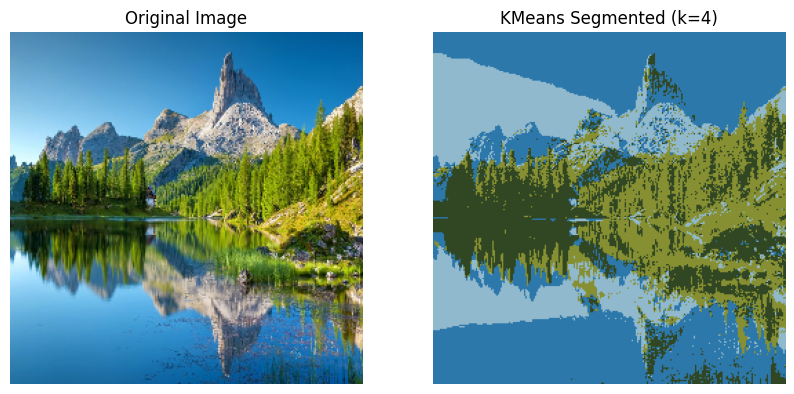

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

image = cv2.imread("Image.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (256, 256))

pixel_vals = image.reshape((-1, 3))
pixel_vals = np.float32(pixel_vals)

k = 4
kmeans = KMeans(n_clusters=k)
kmeans.fit(pixel_vals)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
segmented_image = segmented_data.reshape((image.shape))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title(f"KMeans Segmented (k={k})")
plt.axis("off")
plt.show()

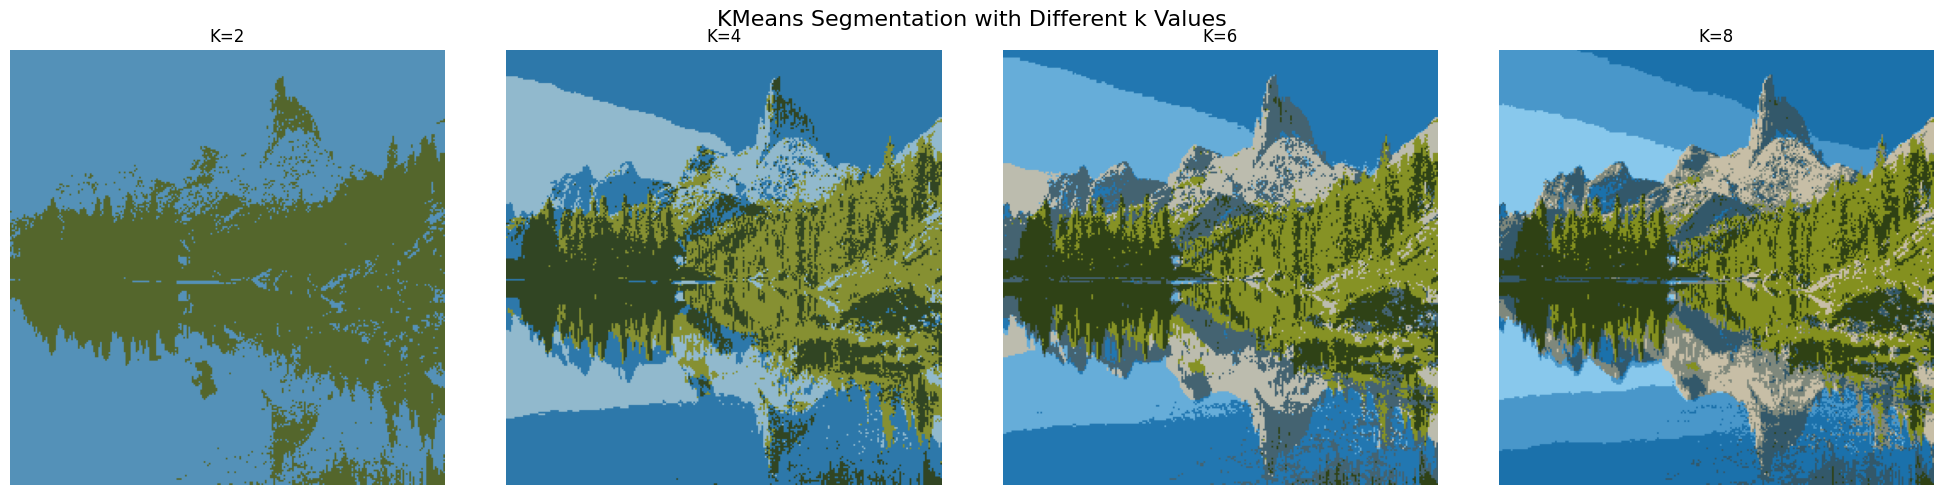

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

image = cv2.imread("Image.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (256, 256))

k_values = [2, 4, 6, 8]

plt.figure(figsize=(20, 5))

for idx, k in enumerate(k_values):
    pixel_vals = image.reshape((-1, 3))
    pixel_vals = np.float32(pixel_vals)

    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pixel_vals)
    centers = np.uint8(kmeans.cluster_centers_)
    segmented = centers[labels.flatten()]
    segmented_image = segmented.reshape(image.shape)

    plt.subplot(1, 4, idx + 1)
    plt.imshow(segmented_image)
    plt.title(f"K={k}")
    plt.axis('off')

plt.suptitle("KMeans Segmentation with Different k Values", fontsize=16)
plt.tight_layout()
plt.show()

**CONCLUSION:** I cloned and executed the GitHub repo for KMeans-based image segmentation on Google Colab using CPU only. I tested it on a custom image and experimented with different cluster values and image resolutions. This helped me understand how clustering groups similar pixels and how parameter changes affect segmentation quality, which is useful for real-world AR/VR applications.